In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 読み込み

In [11]:
df = pd.read_csv("../docker/handouts/diverse-tutorial/qiime_outputs/taxa-outputs/level-3.csv", index_col=0)
df

,d__Bacteria;p__Firmicutes;c__Clostridia,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria,d__Bacteria;p__Bacteroidota;c__Bacteroidia,d__Bacteria;p__WPS-2;c__WPS-2,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia,d__Bacteria;p__Firmicutes;c__Negativicutes,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria,d__Bacteria;p__Firmicutes;__,d__Archaea;p__Halobacterota;c__Methanomicrobia,d__Bacteria;p__Firmicutes;c__Bacilli,...,d__Bacteria;p__Spirochaetota;c__Spirochaetia,d__Bacteria;p__Patescibacteria;c__Saccharimonadia,d__Bacteria;p__Synergistota;c__Synergistia,d__Bacteria;p__Proteobacteria;__,d__Bacteria;p__Cyanobacteria;c__Vampirivibrionia,d__Bacteria;p__Fibrobacterota;c__Fibrobacteria,d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae,d__Bacteria;p__Firmicutes;c__Incertae_Sedis
index,,,,,,,,,,,,,,,,,,,,,
human-18105021,38933.0,2193.0,15565.0,0.0,144.0,4939.0,0.0,0.0,0.0,1156.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human-18105022,40897.0,968.0,14600.0,0.0,2002.0,5293.0,1190.0,12.0,0.0,433.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,5.0,559.0,0.0
human-18105023,31936.0,4713.0,15385.0,0.0,327.0,841.0,0.0,0.0,0.0,10198.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1795.0,20.0
human-18105024,33849.0,336.0,28269.0,0.0,70.0,2526.0,0.0,0.0,0.0,2667.0,...,0.0,0.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human-18105025,41448.0,10393.0,21816.0,0.0,1234.0,3115.0,0.0,0.0,0.0,2498.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,18.0,0.0
pig-SRR27430951,24179.0,176.0,11557.0,25.0,294.0,7.0,6.0,0.0,0.0,500.0,...,0.0,38.0,33.0,0.0,49.0,28.0,0.0,0.0,0.0,0.0
pig-SRR27430952,36090.0,541.0,13349.0,0.0,425.0,9.0,22.0,2.0,51.0,536.0,...,0.0,15.0,34.0,8.0,20.0,12.0,0.0,0.0,0.0,0.0
pig-SRR27430953,33902.0,259.0,10006.0,124.0,371.0,13.0,61.0,30.0,0.0,1231.0,...,0.0,0.0,15.0,0.0,4.0,65.0,0.0,92.0,4.0,0.0
pig-SRR27430954,14338.0,667.0,9354.0,16.0,116.0,17.0,0.0,61.0,0.0,272.0,...,2.0,0.0,0.0,0.0,20.0,11.0,0.0,3.0,0.0,0.0


# 採取・観測されたリード数は、サンプルごとに違う.

In [47]:
# サンプルごとに合計をとり、ソート
## 最小値： 25268 reads
## 最大値： 85669 reads

pd.DataFrame(df.sum(axis=1).sort_values(), columns=["Count"])

,Count
index,
pig-SRR27430954,25268.0
pig-SRR27430951,37030.0
pig-SRR27430955,38119.0
pig-SRR27430953,46837.0
pig-SRR27430952,51298.0
human-18105024,68015.0
human-18105021,68121.0
human-18105023,70685.0
human-18105022,74495.0


# Clostridia綱に注目

In [48]:
name = "d__Bacteria;p__Firmicutes;c__Clostridia"
df[[name]]

,d__Bacteria;p__Firmicutes;c__Clostridia
index,
human-18105021,38933.0
human-18105022,40897.0
human-18105023,31936.0
human-18105024,33849.0
human-18105025,41448.0
pig-SRR27430951,24179.0
pig-SRR27430952,36090.0
pig-SRR27430953,33902.0
pig-SRR27430954,14338.0


In [49]:
df[[name]].loc[["human-18105025", "pig-SRR27430951"]]

,d__Bacteria;p__Firmicutes;c__Clostridia
index,
human-18105025,41448.0
pig-SRR27430951,24179.0


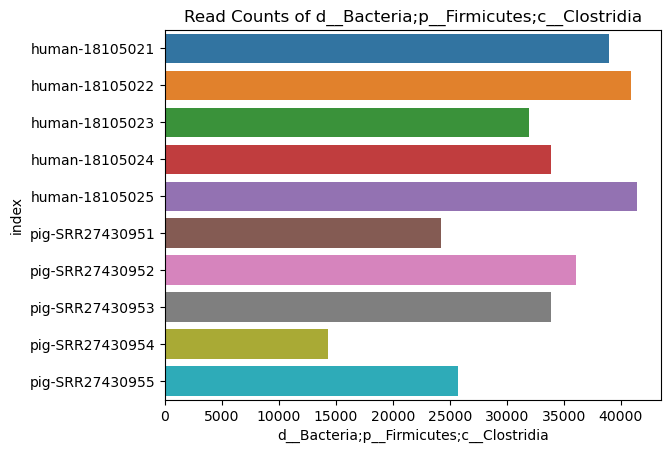

In [51]:
# Clostridia の リードカウント（補正前）
sns.barplot(data=df, x=name, y=df.index)
plt.title(f"Read Counts of {name}")
plt.show()

# -> 人間(human-18105025)の腸内細菌の方が豚(pig-SRR27430951)の腸内細菌よりもClostridiaが多い

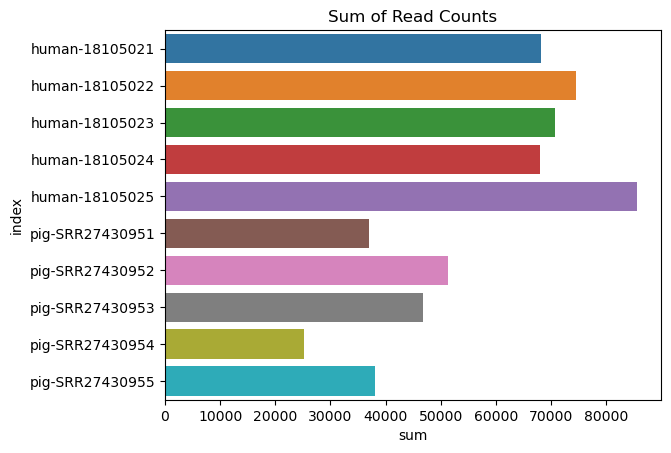

In [52]:
# サンプルごとの合計に再度注目
sum_df = pd.DataFrame(df.sum(axis=1), columns=["sum"])

sns.barplot(data=sum_df, x="sum", y=sum_df.index)
plt.title("Sum of Read Counts")
plt.show()

# -> 人間(human-18105025)の腸内細菌の方が豚(pig-SRR27430951)の腸内細菌よりも合計のリードカウントが多い

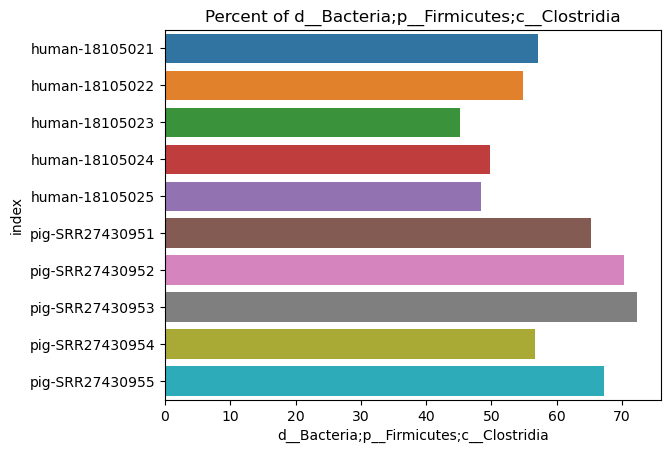

In [42]:
# サンプルごとに合計をとる
percent_df = df.apply(lambda x: x*100 / x.sum(), axis=1)

sns.barplot(data=percent_df, x=name, y=percent_df.index)
plt.title(f"Percent of {name}")
plt.show()